[View in Colaboratory](https://colab.research.google.com/github/frm1789/EA_Python/blob/master/Intro_2_Logistic_regression.ipynb)

# Logistic Regression in Python Using Rodeo

Regresion es una tecnica capaz de predecir un salida binaria. 

Librerias:

*   **Numpy**: numerical arrays and matrix.
*   **Pandas**: handle and operate on data.
*   **statsmodels**: tools para estimacion de parametros y testing estadistico.
*   **pylab**: para generar plots

In [0]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

# Reading the data

1. This dataset has a binary response (outcome, dependent) variable called 'admit' (1: admitted, 0: Not). 
    
2. There are three predictor variables: 'gre', 'gpa' and 'rank'. I will treat the variables 'gre' and 'gpa' as continuous. 
    
3. The variable 'rank' takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.
   

In [21]:
import io
import requests
data= pd.read_csv("https://raw.githubusercontent.com/frm1789/EA_Python/master/binary.csv")

data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Rename the columns because rank is a reserved word, we will change it for < prestige >.

In [0]:
data.columns = ["admit", "gre", "gpa", "prestige"]

# Exploring the dataset

In [23]:
data.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2f72c3550>,
      dtype=object)

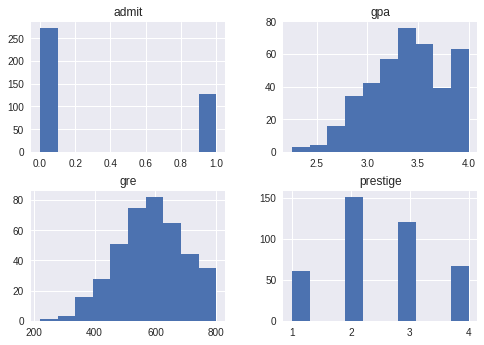

In [24]:
data.hist()

# Dummy variables

We're going dummify the "prestige" column using get_dummies.

get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified. In this case, prestige has four levels: 1, 2, 3 and 4 (1 being most prestigious). When we call get_dummies, we get a dataframe with four columns, each of which describes one of those levels.

In [25]:
dummy_ranks = pd.get_dummies(data['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [26]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data_dummies = data[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
data_dummies.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


Agregar manualmente la interseccion

In [0]:
data_dummies['intercept'] = 1.0

# Performing the regression

Generar la regresión es bastante simple. Especificamos la columna que contiene la variable que está intentando predecir seguida de las columnas que el modelo debe usar para hacer la predicción.

En nuestro caso, predeciremos la columna de admisión utilizando gre, gpa y las variables ficticias de prestigio prestige_2, prestige_3 y prestige_4. 

Vamos a tratar prestige_1 como nuestra línea de base y lo excluiremos de nuestro ajuste. 

[No entiendo porque excluimos prestige_1]Esto se hace para prevenir la multicolinealidad, o la captura de variables ficticias causada por la inclusión de una variable ficticia para cada categoría.

In [28]:
train_cols = data_dummies.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data_dummies['admit'], data_dummies[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


Estamos utilizando la funcion Logit de la libreria statsmodels.

# Interpreting the results


In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 Oct 2018   Pseudo R-squ.:                 0.08292
Time:                        12:54:08   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""

In [30]:
result.conf_int()

,0,1
gre,0.000120,0.004409
gpa,0.153684,1.454391
prestige_2,-1.295751,-0.055135
prestige_3,-2.016992,-0.663416
prestige_4,-2.370399,-0.732529
intercept,-6.224242,-1.755716


# Odds ratio

Excelente articulo explicando que son los odds: http://networkianos.com/odd-ratio-que-es-como-se-interpreta/



In [31]:
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64